In [2]:
import numpy as np
import csv

class reader(object):
  def __init__(self, data_file = "./data/wdbc.data"):
    self.value = []
    with open(data_file, "rb") as f:
      csv_reader = csv.reader(f, delimiter=",")
      for i, row in enumerate(csv_reader):
        self.value.append(row)
    # print self.value[0]
    # print self.value[0][0]
    # print self.value[0][1]

    self.raw_to_vector(self.value)
    self.split(num_validation_examples=50)
    
#     print self.id.shape
    print self.x.shape
    print self.y.shape
    
    self.num_examples = len(self.x_train)
    self.start_index = 0
    self.shuffle_indices = range(self.num_examples)

    self.num_examples_val = len(self.x_val) # = 50 (validation_data)
    self.start_index_val = 0
    self.shuffle_indices_val = range(self.num_examples_val)
    print self.num_examples_val

  def raw_to_vector(self, value):
    self.id = []
    self.x = []
    self.y = []

    for row in self.value:
        x = np.zeros(30)
        for i in range(30):
            x[i] = float(row[i+2])
        if row[1] == "B":
            y = 0
        else:
            y = 1
        self.x.append(x)
        self.y.append(y)
        id = int(row[0])
        self.id.append(id)
        
    self.x, self.y, self.id = np.array(self.x), np.array(self.y), np.array(self.id)

  def split(self, num_validation_examples):
    self.x_train = self.x[ num_validation_examples: ]
    self.x_val = self.x[ : num_validation_examples ]

    self.y_train = self.y[ num_validation_examples: ]
    self.y_val = self.y[ : num_validation_examples ]

    self.id_train = self.id[ num_validation_examples: ]
    self.id_val = self.id[ :num_validation_examples ]

  def next_batch(self, batch_size, split="train"):

    if split == "train":
      if self.start_index == 0:
        np.random.shuffle(self.shuffle_indices) # shuffle indices

      end_index = min([self.num_examples, self.start_index + batch_size])
      batch_indices = [ self.shuffle_indices[idx] for idx in range(self.start_index, end_index) ]

      batch_x = self.x_train[ batch_indices ]
      batch_y = self.y_train[ batch_indices ]
      batch_id = self.id_train[ batch_indices ] 

      if end_index == self.num_examples:
        self.start_index = 0
      else: self.start_index = end_index

      return batch_x, batch_y, batch_id 

    elif split == "val":
      if self.start_index_val == 0:
        np.random.shuffle(self.shuffle_indices_val) # shuffle indices

      end_index = min([self.num_examples_val, self.start_index_val + batch_size])
      batch_indices = [ self.shuffle_indices_val[idx] for idx in range(self.start_index_val, end_index) ]

      batch_x = self.x_val[ batch_indices ]
      batch_y = self.y_val[ batch_indices ]
      batch_id = self.id_val[ batch_indices ] 

      if end_index == self.num_examples_val:
        self.start_index_val = 0
      else: self.start_index_val = end_index

      return batch_x, batch_y, batch_id  

(569, 30)
(569,)
50
Estimator	Homogeneity	Completeness	V-means		ARI		AMI		Silhouette
k=2		0.422		0.517		0.465		0.491		0.422		0.697
k=3		0.467		0.464		0.465		0.522		0.462		0.673
k=4		0.575		0.333		0.422		0.413		0.332		0.533
k=5		0.602		0.298		0.398		0.342		0.296		0.510
k=6		0.623		0.280		0.387		0.322		0.278		0.486
k=7		0.631		0.248		0.356		0.260		0.245		0.468
k=8		0.631		0.246		0.354		0.259		0.243		0.466
k=9		0.655		0.236		0.347		0.234		0.233		0.472
k=10		0.660		0.232		0.343		0.230		0.228		0.467


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


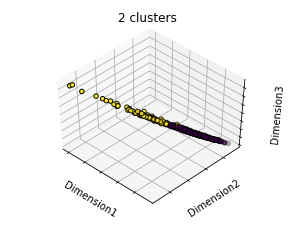

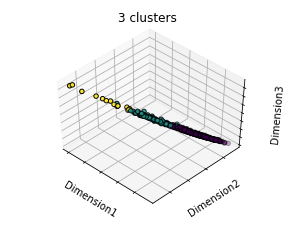

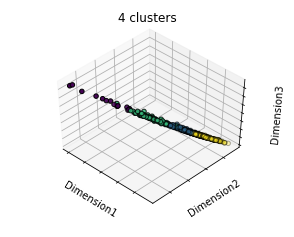

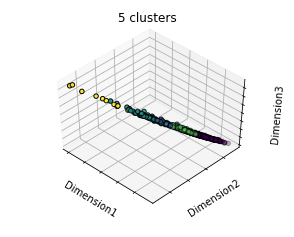

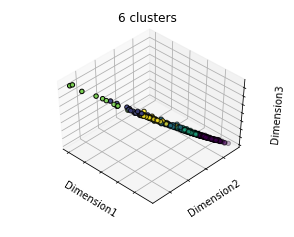

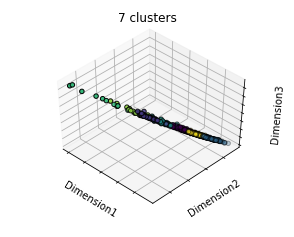

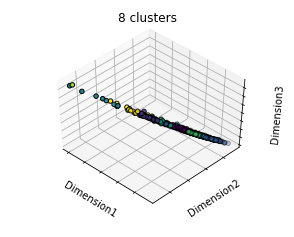

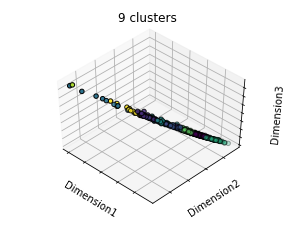

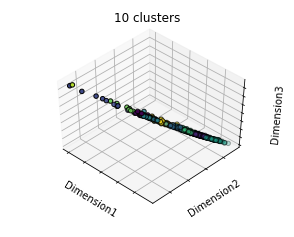

ValueError: posx and posy should be finite values

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics # 실루엣스코어 계산할때 편리하더라



np.random.seed(5)

data_reader = reader()
X = data_reader.x
y = data_reader.y

estimators = [('k=2', KMeans(n_clusters=2)), 
              ('k=3', KMeans(n_clusters=3)),
              ('k=4', KMeans(n_clusters=4)),
              ('k=5', KMeans(n_clusters=5)),
              ('k=6', KMeans(n_clusters=6)),
              ('k=7', KMeans(n_clusters=7)),
              ('k=8', KMeans(n_clusters=8)),
              ('k=9', KMeans(n_clusters=9)),
              ('k=10', KMeans(n_clusters=10))]             

# print metric measure headers
print ("Estimator\tHomogeneity\tCompleteness\tV-means\t\tARI\t\tAMI\t\tSilhouette") # ari : 정답set이 있을때만 / Silhouette : 정답set 없을때도 사용가능

fignum = 1
titles = ['2 clusters', '3 clusters','4 clusters','5 clusters','6 clusters','7 clusters','8 clusters', '9 clusters', '10 clusters']
#titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
	fig = plt.figure(fignum, figsize=(4, 3))
	ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
	est.fit(X) # est 하나가 (a)임
	labels = est.labels_

	# measure cluster qualities
	print('%s\t\t%.3f\t\t%.3f\t\t%.3f\t\t%.3f\t\t%.3f\t\t%.3f'
          % (name, 
             metrics.homogeneity_score(y, est.labels_),
             metrics.completeness_score(y, est.labels_),
             metrics.v_measure_score(y, est.labels_),
             metrics.adjusted_rand_score(y, est.labels_),
             metrics.adjusted_mutual_info_score(y, est.labels_),
             metrics.silhouette_score(X, est.labels_, metric='euclidean')))
			

	ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')

	ax.w_xaxis.set_ticklabels([])
	ax.w_yaxis.set_ticklabels([])
	ax.w_zaxis.set_ticklabels([])
	ax.set_xlabel('Dimension1') # Petal width
	ax.set_ylabel('Dimension2') # Sepal length
	ax.set_zlabel('Dimension3') # Petal length
	ax.set_title(titles[fignum - 1])
	ax.dist = 12
	fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
	ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()
plt.show()

